## Check GPU allocation
If "Found GPU at: / device: GPU: 0" is displayed, the GPU is ready to use.

In [7]:
%tensorflow_version 1.13.1
import glob
from IPython.display import Image
import tensorflow
print(tensorflow.__version__)

## Git Clone the donkey repository

In [2]:
!git clone https://github.com/juan-ivan-NV/autonomous-ai-mini-vehicle


fatal: destination path 'autonomous-ai-mini-vehicle' already exists and is not an empty directory.


In [3]:
%cd /content/autonomous-ai-mini-vehicle/donkeycar-docker-master/donkeycar-docker-master
!git checkout master

/content/autonomous-ai-mini-vehicle/donkeycar-docker-master/donkeycar-docker-master
Already on 'master'
Your branch is up to date with 'origin/master'.


## Install donkey car


In [4]:
!pip3 install -e .[pc]

Obtaining file:///content/autonomous-ai-mini-vehicle/donkeycar-docker-master/donkeycar-docker-master
  Attempting uninstall: donkeycar
    Found existing installation: donkeycar 4.3.5
    Can't uninstall 'donkeycar'. No files were found to uninstall.
  Running setup.py develop for donkeycar


# Step 2: Supply Data
In order to train the neural network we need to supply trainings data which are recorded on the raspi during driving the donkeycar on the track

In [5]:
%cd /content/autonomous-ai-mini-vehicle/donkeycar-docker-master/donkeycar-docker-master/mycar1/data
!unzip tub_36_19-04-13.zip

Streaming output truncated to the last 5000 lines.
  inflating: tub_36_19-04-13/5509_cam-image_array_.jpg  
  inflating: tub_36_19-04-13/552_cam-image_array_.jpg  
  inflating: tub_36_19-04-13/5584_cam-image_array_.jpg  
  inflating: tub_36_19-04-13/5622_cam-image_array_.jpg  
  inflating: tub_36_19-04-13/5639_cam-image_array_.jpg  
  inflating: tub_36_19-04-13/5684_cam-image_array_.jpg  
  inflating: tub_36_19-04-13/5709_cam-image_array_.jpg  
  inflating: tub_36_19-04-13/5723_cam-image_array_.jpg  
  inflating: tub_36_19-04-13/5748_cam-image_array_.jpg  
  inflating: tub_36_19-04-13/5757_cam-image_array_.jpg  
  inflating: tub_36_19-04-13/5769_cam-image_array_.jpg  
  inflating: tub_36_19-04-13/581_cam-image_array_.jpg  
  inflating: tub_36_19-04-13/5828_cam-image_array_.jpg  
  inflating: tub_36_19-04-13/5836_cam-image_array_.jpg  
  inflating: tub_36_19-04-13/5850_cam-image_array_.jpg  
  inflating: tub_36_19-04-13/5855_cam-image_array_.jpg  
  inflating: tub_36_19-04-13/5858_cam-i

# Step 4: Train your model
<a id='train_model'></a>
There are several types of modes available:

 - linear
 - categorical
 - rnn
 - imu
 - behavior
 - 3d
 - localizer  
 And you can use pre-trained models by adding a flag
- `[--transfer=<model>]`

In [5]:
#!python /content/mycar/manage.py train --type linear --model /content/mycar/models/mypilot.h5
#!python /content/mycar/train.py --type linear --model /content/mycar/models/mypilot.h5
!python /content/autonomous-ai-mini-vehicle/donkeycar-docker-master/donkeycar-docker-master/mycar1/train.py --tub '/content/autonomous-ai-mini-vehicle/donkeycar-docker-master/donkeycar-docker-master/mycar1/data/tub_36_19-04-13' --model /content/autonomous-ai-mini-vehicle/donkeycar-docker-master/donkeycar-docker-master/mycar1/models/test2.h5
#!donkey contrain --tub /content/mycar1//data/tub_36_19-04-13 --model /content/mycar1/models/mypilot.h5

using donkey v3.1.1 ...
loading config file: /content/autonomous-ai-mini-vehicle/donkeycar-docker-master/donkeycar-docker-master/mycar1/config.py
loading personal config over-rides

config loaded
"get_model_by_type" model Type is: linear
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
training with model type <class 'donkeycar.parts.keras.KerasLinear'>
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img_in (InputLayer)             [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 110, 110, 24) 1824        img_in[0][0]                     
__________________________________________________________________________________________________
dro

## Plot loss curve of model
The curve should show smaller loss vs epochs and the train and validation loss should not differ too much. 
>  Tip: If train loss is much smaller than validation loss your model might be overfitting.


/content/autonomous-ai-mini-vehicle/donkeycar-docker-master/donkeycar-docker-master/mycar1/models


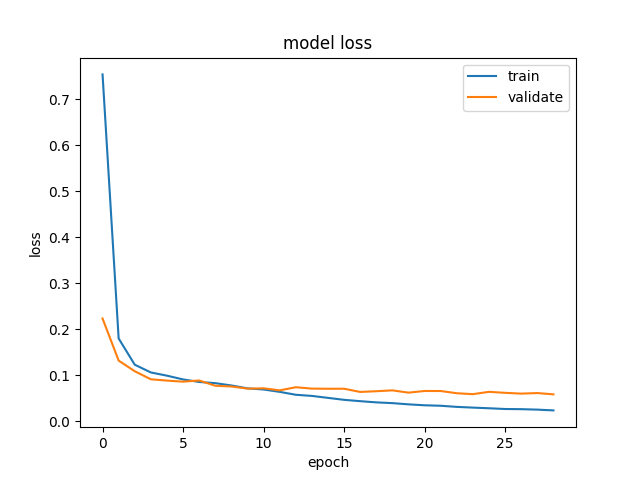

In [10]:
%cd /content/autonomous-ai-mini-vehicle/donkeycar-docker-master/donkeycar-docker-master/mycar1/models
file = glob.glob("*.png")
Image(file[0])